In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**데이터 전처리** (CSV파일의 label을 txt label로 변경)

In [ ]:
import pandas as pd
import os

# csv 로드.
df = pd.read_csv('/content/drive/MyDrive/dataset/train/train_output.csv')

# 각 row에 대해서 수행
for index, row in df.iterrows():
    filename = row['filename']
    labels = row['label'].split("\n")  # 줄바꿈 문자에 따라 레이블을 분리

    # 출력 디렉토리를 생성
    os.makedirs('/content/drive/MyDrive/dataset/train_label', exist_ok=True)

    # 각 파일에 대한 .txt 파일
    with open(f'train_label/{filename}.txt', 'w') as f:
        for label in labels:
            f.write(label + "\n")

**yolov5 라이브러리 깃으로 설치**

In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15679, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15679 (delta 1), reused 2 (delta 0), pack-reused 15672
Receiving objects: 100% (15679/15679), 14.45 MiB | 14.20 MiB/s, done.
Resolving deltas: 100% (10742/10742), done.


In [ ]:
%cd /content/drive/MyDrive/dataset/yolov5

/content/drive/MyDrive/dataset/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.1/593.1 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


**yolov5를 실행하기 위해 데이터셋 분리 및 data.yaml 작성**

In [ ]:
%cd /
from glob import glob

img_list = glob('/content/drive/MyDrive/dataset/train/images/*.jpg')

print(len(img_list))

/
1204


In [ ]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size =0.2, random_state = 2000)

print(len(train_img_list), len(val_img_list))

963 241


In [ ]:
with open('/content/drive/MyDrive/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')
with open('/content/drive/MyDrive/dataset/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [ ]:
import yaml

with open('/content/drive/MyDrive/dataset/data.yaml', 'r') as f:
  data = yaml.safe_load(f)
print(data)

{'names': ['0', '1', '2', '3'], 'nc': 4, 'train': '/content/drive/MyDrive/dataset/train.txt', 'val': '/content/drive/MyDrive/dataset/val.txt'}


In [ ]:
# Create .yaml file
import yaml

data_yaml = dict(
    train = '/content/drive/MyDrive/dataset/train.txt',
    val = '/content/drive/MyDrive/dataset/val.txt',
    nc = 4,
    names = ['buffalo', 'elephant', 'rhino', 'zebra']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('/content/drive/MyDrive/dataset/data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

%cat /content/drive/MyDrive/dataset/data.yaml

{names: [buffalo, elephant, rhino, zebra], nc: 4, train: /content/drive/MyDrive/dataset/train.txt,
  val: /content/drive/MyDrive/dataset/val.txt}


In [ ]:
import yaml

with open('/content/drive/MyDrive/dataset/data.yaml', 'r') as f:
  data = yaml.safe_load(f)
print(data)

{'names': ['buffalo', 'elephant', 'rhino', 'zebra'], 'nc': 4, 'train': '/content/drive/MyDrive/dataset/train.txt', 'val': '/content/drive/MyDrive/dataset/val.txt'}


**Training**

Animal_yolov5m_results_640_16_3ep

In [ ]:
%cd /content/drive/MyDrive/dataset/yolov5

!python train.py --img 640 --batch 16 --epochs 3 --data /content/drive/MyDrive/dataset/data.yaml --cfg ./models/yolov5m.yaml --weights yolov5m.pt --name Animal_yolov5m_results_640_16_3ep

/content/drive/MyDrive/dataset/yolov5
train: weights=yolov5m.pt, cfg=./models/yolov5m.yaml, data=/content/drive/MyDrive/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Animal_yolov5m_results_640_16_3ep, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 4 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_

Animal_yolov5l_results_800_16_3ep

In [ ]:
%cd /content/drive/MyDrive/dataset/yolov5

!python train.py --img 800 --batch 16 --epochs 3 --data /content/drive/MyDrive/dataset/data.yaml  --weights yolov5l.pt --name Animal_yolov5m_results_800_16_3ep

/content/drive/MyDrive/dataset/yolov5
train: weights=yolov5l.pt, cfg=, data=/content/drive/MyDrive/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Animal_yolov5m_results_800_16_3ep, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 4 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_mo

*Animal_yolov5m_results_224_16_300ep*

In [ ]:
%cd /content/drive/MyDrive/dataset/yolov5

!python train.py --img 224 --batch 16 --epochs 300 --data /content/drive/MyDrive/dataset/data.yaml  --weights yolov5m.pt --name Animal_yolov5m_results_224_16_300ep

/content/drive/MyDrive/dataset/yolov5
train: weights=yolov5m.pt, cfg=, data=/content/drive/MyDrive/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Animal_yolov5m_results_224_16_300ep, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 4 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmu

In [ ]:
# yaml파일 경로 수정(txt가 아닌 폴더로)
import yaml

data_yaml = dict(
    train = '/content/drive/MyDrive/dataset/train',
    val = '/content/drive/MyDrive/dataset/test', #val 폴더를 따로 만들기 전에 일단 임시방편으로 test데이터셋을 한번 써봄
    nc = 4,
    names = ['buffalo', 'elephant', 'rhino', 'zebra']
)

with open('/content/drive/MyDrive/dataset/data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

%cat /content/drive/MyDrive/dataset/data.yaml

{names: [buffalo, elephant, rhino, zebra], nc: 4, train: /content/drive/MyDrive/dataset/train,
  val: /content/drive/MyDrive/dataset/test}


In [ ]:
import yaml

with open('/content/drive/MyDrive/dataset/data.yaml', 'r') as f:
  data = yaml.safe_load(f)
print(data)

{'names': ['buffalo', 'elephant', 'rhino', 'zebra'], 'nc': 4, 'train': '/content/drive/MyDrive/dataset/train', 'val': '/content/drive/MyDrive/dataset/test'}


*Animal_yolov5m_results_224_16_10ep*

In [ ]:
%cd /content/drive/MyDrive/dataset/yolov5

!python train.py --img 224 --batch 16 --epochs 10 --data /content/drive/MyDrive/dataset/data.yaml  --weights yolov5m.pt --name Animal_yolov5m_results_224_16_10ep

/content/drive/MyDrive/dataset/yolov5
train: weights=yolov5m.pt, cfg=, data=/content/drive/MyDrive/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Animal_yolov5m_results_224_16_10ep, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 4 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_

#드디어 잘나옴. 역시 label없이 학습되었음. 하지만 colab의 GPU사용 제한으로 중지

**Animal_yolov5m_results_224_16_100ep**

In [ ]:
%cd /content/drive/MyDrive/dataset/yolov5

!python train.py --img 224 --batch 16 --epochs 100 --data /content/drive/MyDrive/dataset/data.yaml  --weights yolov5m.pt --name Animal_yolov5m_results_224_16_100ep

/content/drive/MyDrive/dataset/yolov5
train: weights=yolov5m.pt, cfg=, data=/content/drive/MyDrive/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Animal_yolov5m_results_224_16_100ep, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 4 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmu

**val.py를 바꾸고 train**

In [ ]:
%cd /content/drive/MyDrive/dataset/yolov5

!python train.py --img 224 --batch 16 --epochs 1 --data /content/drive/MyDrive/dataset/data.yaml  --weights yolov5m.pt --name Animal_yolov5m_results_224_16_1ep

/content/drive/MyDrive/dataset/yolov5
train: weights=yolov5m.pt, cfg=, data=/content/drive/MyDrive/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=16, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Animal_yolov5m_results_224_16_1ep, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 225 (delta 164), reused 176 (delta 154), pack-reused 36
Receiving objects: 100% (225/225), 72.63 KiB | 5.19 MiB/s, done.
Command 'git fetch origin' timed out after 5 

In [ ]:
%cd /content/drive/MyDrive/dataset/yolov5

!python train.py --img 224 --batch 16 --epochs 1 --data /content/drive/MyDrive/dataset/data.yaml  --weights yolov5m.pt --device mps --name Animal_yolov5m_results_224_16_1ep

/content/drive/MyDrive/dataset/yolov5
train: weights=yolov5m.pt, cfg=, data=/content/drive/MyDrive/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=16, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=mps, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Animal_yolov5m_results_224_16_1ep, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), 3.89 KiB | 113.00 KiB/s, done.
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 

**Inference**

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
from IPython.display import Image
import os

val_img_path = val_img_list[0]

!python detect.py --weights /content/drive/MyDrive/dataset/yolov5/runs/train/Animal_yolov5s_results3/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"

detect: weights=['/content/drive/MyDrive/dataset/yolov5/runs/train/Animal_yolov5s_results3/weights/best.pt'], source=/content/drive/MyDrive/dataset/train/images/0165.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/dataset/train/images/0165.jpg: 256x416 (no detections), 39.7ms
Speed: 0.3ms pre-process, 39.7ms inference, 0.4ms NMS per imag

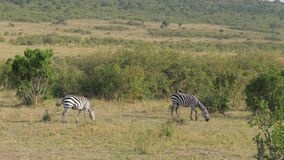

In [ ]:
Image(os.path.join('/content/drive/MyDrive/dataset/yolov5/runs/detect/exp2', os.path.basename(val_img_path)))

In [ ]:
test_img_list = '/content/drive/MyDrive/dataset/test/images'

In [ ]:
%cd /content/drive/MyDrive/dataset/yolov5
!python detect.py --weights /content/drive/MyDrive/dataset/yolov5/runs/train/Animal_yolov5m_results_224_16_100ep/weights/best.pt --img 224 --conf 0.5 --source "{test_img_list}"

/content/drive/MyDrive/dataset/yolov5
detect: weights=['/content/drive/MyDrive/dataset/yolov5/runs/train/Animal_yolov5m_results_224_16_100ep/weights/best.pt'], source=/content/drive/MyDrive/dataset/test/images, data=data/coco128.yaml, imgsz=[224, 224], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
image 1/300 /content/drive/MyDrive/dataset/test/images/1205.jpg: 160x224 (no detections), 38.9ms
image 2/300 /content/d

**Val**

In [ ]:
%cd /content/drive/MyDrive/dataset/yolov5

!python val.py --data /content/drive/MyDrive/dataset/data.yaml  --weights /content/drive/MyDrive/dataset/yolov5/runs/train/Animal_yolov5m_results_224_16_100ep/weights/best.pt --name Animal_yolov5m_results_224_16_1ep